# Credit Card Fraud Detection Data Analysis

## Objective: Prediction of transaction whether it is Fraud or  genuine

### About Dataset

### Context

* It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content 

* The dataset contains transactions made by credit cards in September 2013 by European cardholders

* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

### predicted/Response variable
* 1 if transaction is Fraud or 0 if genuine

In [1]:
# Liabraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

#spliting dataset
from sklearn.model_selection import train_test_split as tts

# Algorithem for Model Training
from sklearn.linear_model import LogisticRegression

# Checking Accuracy Score
from sklearn import metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
#reading csv file
credit_card_data=pd.read_csv("creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.shape
print("Total Rows and Columns are:",credit_card_data.shape)

Total Rows and Columns are: (284807, 31)


In [4]:
credit_card_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
credit_card_data.columns   #check columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284805 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284795 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284805 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284802 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284805 non-null  float64
 21  V21     28

In [7]:
credit_card_data.head(5)  #Show top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_data.tail(3)  #show last 3 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
credit_card_data
credit_card_data.isnull().sum()     #check null values

Time       0
V1         0
V2         1
V3         0
V4         1
V5         2
V6         1
V7         0
V8         0
V9         1
V10        0
V11       12
V12        1
V13        0
V14        0
V15        2
V16        1
V17        5
V18        0
V19        0
V20        2
V21        3
V22        1
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
dtype: int64

In [10]:
#Fill null values
credit_card_data["V2"].fillna(credit_card_data["V2"].mean(),inplace=True) 
credit_card_data["V4"].fillna(credit_card_data["V4"].mean(),inplace=True) 
credit_card_data["V5"].fillna(credit_card_data["V5"].mean(),inplace=True) 
credit_card_data["V6"].fillna(credit_card_data["V6"].mean(),inplace=True)
credit_card_data["V9"].fillna(credit_card_data["V9"].mean(),inplace=True) 
credit_card_data["V11"].fillna(credit_card_data["V11"].mean(),inplace=True) 
credit_card_data["V12"].fillna(credit_card_data["V12"].mean(),inplace=True) 
credit_card_data["V15"].fillna(credit_card_data["V15"].mean(),inplace=True)
credit_card_data["V16"].fillna(credit_card_data["V16"].mean(),inplace=True)
credit_card_data["V17"].fillna(credit_card_data["V17"].mean(),inplace=True) 
credit_card_data["V20"].fillna(credit_card_data["V20"].mean(),inplace=True) 
credit_card_data["V21"].fillna(credit_card_data["V21"].mean(),inplace=True) 
credit_card_data["V22"].fillna(credit_card_data["V22"].mean(),inplace=True)


In [11]:
credit_card_data.isnull().sum()  #clean Dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
credit_card_data.nunique() 

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275656
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275637
V12       275654
V13       275657
V14       275653
V15       275652
V16       275645
V17       275642
V18       275655
V19       275645
V20       275631
V21       275615
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
Class          2
dtype: int64

In [13]:
credit_card_data.corr().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059024e-02,-4.196182e-01,-0.105267,1.730643e-01,-6.301453e-02,8.471437e-02,-3.694943e-02,-8.668052e-03,...,4.475244e-02,1.440528e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,5.331167e-07,-2.118614e-12,0.000003,2.492002e-06,3.359050e-07,-1.116494e-13,2.114527e-12,1.870933e-06,...,8.898202e-06,-7.259306e-07,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010590,5.331167e-07,1.000000e+00,-2.679192e-06,-0.000003,1.105011e-07,-4.407163e-07,5.365469e-08,9.705871e-07,1.446964e-07,...,-4.084777e-08,1.399899e-06,8.722203e-08,-1.014962e-06,4.815865e-07,1.503549e-06,-1.205335e-07,6.767997e-07,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,-2.679192e-06,1.000000e+00,0.000002,2.174973e-06,-1.688114e-06,3.405586e-12,-1.272385e-12,-4.305918e-07,...,-1.172001e-05,1.984511e-06,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105267,2.523817e-06,-3.208436e-06,2.056131e-06,1.000000,-2.301918e-06,-2.101371e-06,-3.924800e-06,1.384075e-07,3.295662e-07,...,-9.231528e-06,-1.959577e-07,1.515429e-07,2.819280e-06,1.645066e-06,-9.159838e-07,3.621638e-07,1.679783e-07,0.098731,0.133448


In [14]:
credit_card_data['Class'].count()      #class column having 0 and 1 values.

284807

In [15]:
credit_card_data['Class'].std() #find standard deviation

0.0415271896355952

In [16]:
credit_card_data_pivot = credit_card_data.copy()   #create duplicate table for pivot table

In [17]:
credit_card_data_pivot.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [18]:
credit_card_data_pivot=credit_card_data_pivot.pivot_table('Amount',columns='Class',aggfunc='sum')

In [19]:
credit_card_data_pivot  #display normal and fraud transaction

Class,0,1
Amount,25102462.04,60127.97


In [20]:
credit_card_data.Class.unique()

array([0, 1], dtype=int64)

In [21]:
#distribution of legit transaction & fraudlent transaction

print("0 is normal transaction")
print("1 is Fraud transaction")
credit_card_data['Class'].value_counts()

0 is normal transaction
1 is Fraud transaction


0    284315
1       492
Name: Class, dtype: int64

In [22]:
credit_card_data[credit_card_data["Class"]==0]           #total normal transaction=283253

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
credit_card_data[credit_card_data["Class"]==1]        #total fraud = 473   

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
#Separating the data for analysis
legit=credit_card_data[credit_card_data.Class == 0] 
Fraud=credit_card_data[credit_card_data.Class == 1]

In [25]:
print("Total Normal transaction",legit.shape)
print("Total Fraud transaction",Fraud.shape)

Total Normal transaction (284315, 31)
Total Fraud transaction (492, 31)


In [26]:
#checking All important values of legit
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [28]:
#compare the values for both transaction 
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006273,0.012171,-0.007855,0.005459,0.002417,0.009637,-0.000987,0.004471,...,-0.000638,-0.001241,-0.000022,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Under-sampling
* Building a sample containing distribution of normal Transactions and Fraud Transactions

In [29]:
#Fraud_transaction=492
legit_sample=legit.sample(n=492)

In [30]:
#Now we will add both fraud and legit Transactions
#we will use concat function to add
new_dataset=pd.concat([legit_sample,Fraud],axis=0)

## Data Visualization 

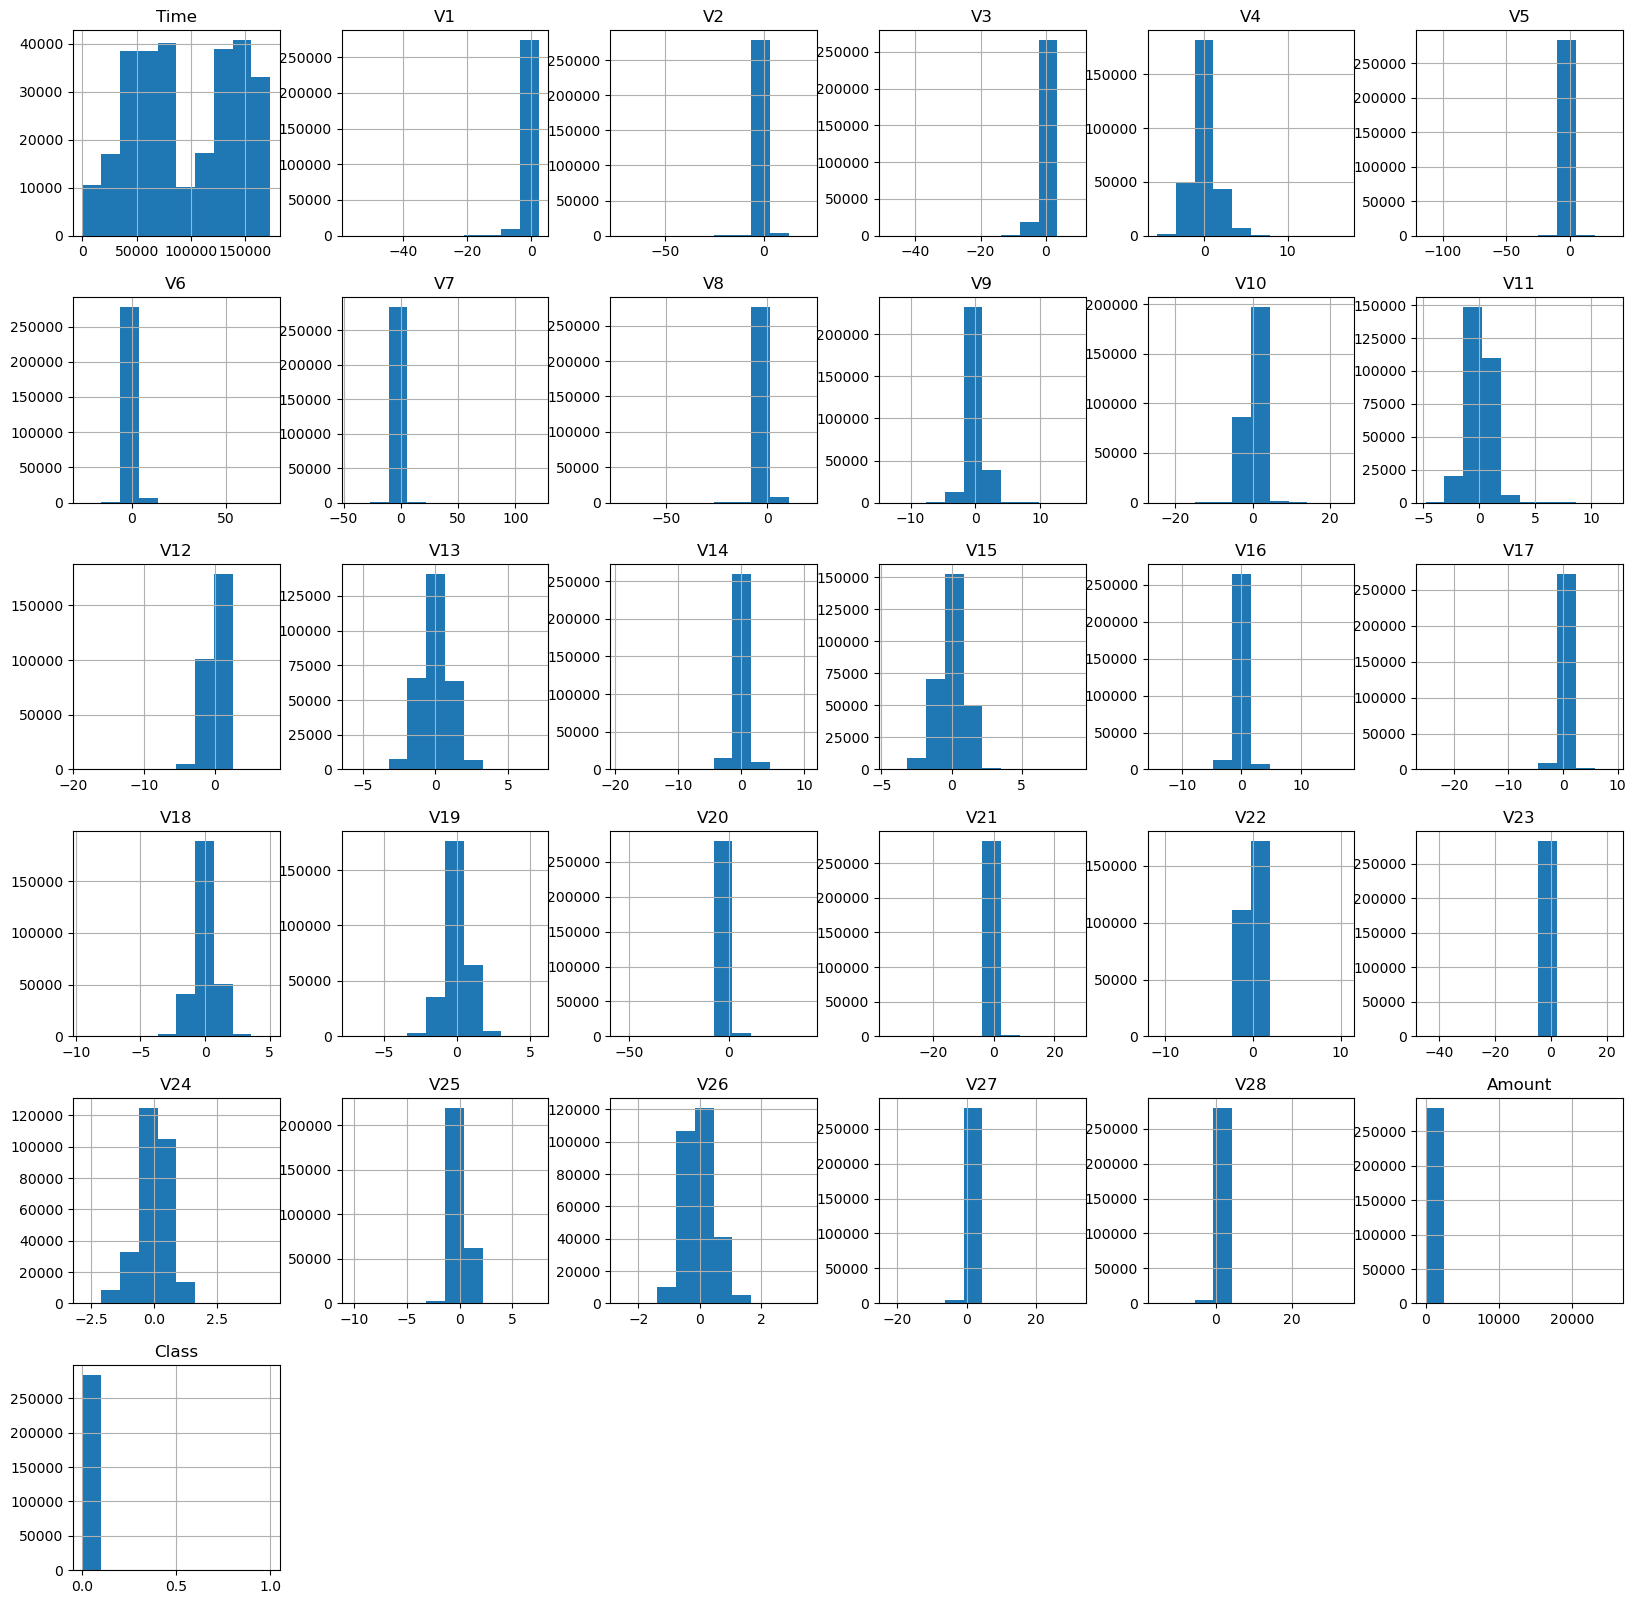

In [31]:
credit_card_data.hist(figsize=(20,20))
plt.show()

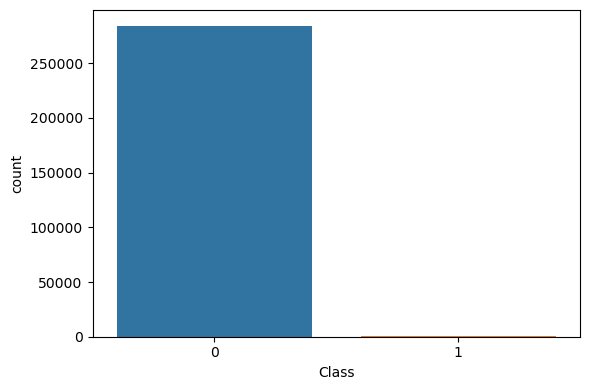

In [32]:
fig, ax = plt.subplots(figsize=(6,4))    #visualize class using subplots.
ax=sns.countplot(x='Class',data=credit_card_data)
plt.tight_layout()

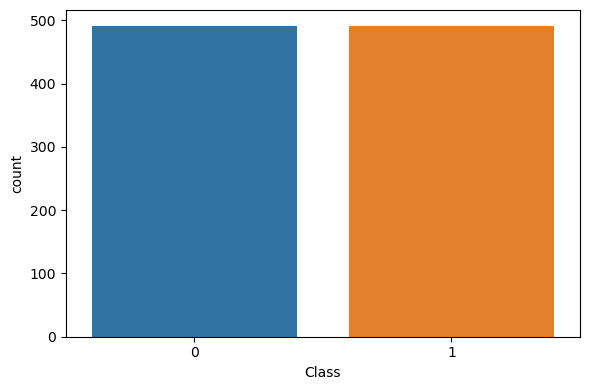

In [33]:
fig, ax = plt.subplots(figsize=(6,4))    #visualize class using subplots.
ax=sns.countplot(x='Class',data=new_dataset)
plt.tight_layout()

In [34]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118666,75166.0,1.110488,0.107618,0.819569,1.354640,-0.528606,-0.267691,-0.114132,0.041483,0.481017,...,-0.216008,-0.433702,0.104210,0.376271,0.374001,-0.535826,0.054893,0.029286,15.99,0
273747,165682.0,-6.164101,-14.483886,-7.325884,2.040879,-4.311077,-0.261889,6.230377,-1.740938,-1.426988,...,2.589506,-1.788242,-3.937858,0.390837,-1.129261,0.583962,-0.950722,0.652777,4361.17,0
75297,55989.0,-1.405573,-1.201156,1.407544,-0.619420,-2.396461,0.402020,2.106896,-0.173298,0.736188,...,0.454763,0.512625,1.150600,0.366364,0.298301,-0.615683,-0.011243,0.170967,600.00,0
107230,70346.0,-1.484587,0.655075,1.189207,0.315851,-0.484758,-0.990875,1.250129,-0.165033,0.163805,...,-0.219759,-0.435523,-0.252428,0.638203,-0.289122,-0.802306,-0.182558,-0.497635,144.00,0
180341,124498.0,-0.320065,1.059634,-1.849994,-0.291318,3.754725,3.368319,1.106423,0.746065,-0.994505,...,0.073587,0.184934,-0.265946,0.579814,0.353692,-0.430571,0.164277,0.178516,50.08,0


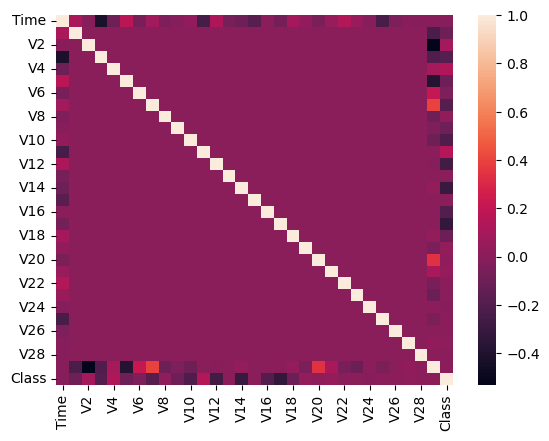

In [35]:
sns.heatmap(credit_card_data.corr())
plt.show()

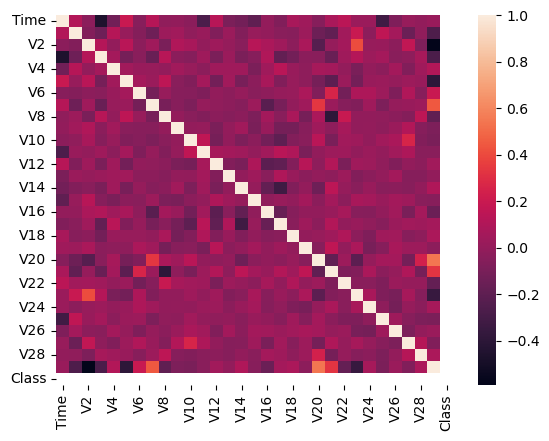

In [36]:
sns.heatmap(legit_sample.corr())
plt.show()

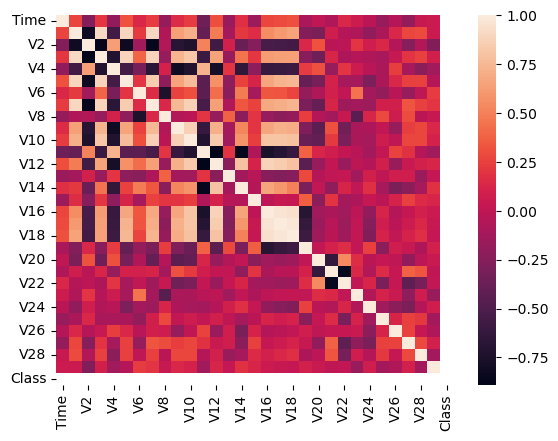

In [37]:
sns.heatmap(Fraud.corr())
plt.show()

In [38]:
#Depenedent and Independent variable
X=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [39]:
new_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Spliting Dataset

In [40]:
X=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [41]:
print("Dataset in X : \n",X)
print("Dataset in Y : \n", y)

Dataset in X : 
             Time        V1         V2        V3        V4        V5        V6  \
118666   75166.0  1.110488   0.107618  0.819569  1.354640 -0.528606 -0.267691   
273747  165682.0 -6.164101 -14.483886 -7.325884  2.040879 -4.311077 -0.261889   
75297    55989.0 -1.405573  -1.201156  1.407544 -0.619420 -2.396461  0.402020   
107230   70346.0 -1.484587   0.655075  1.189207  0.315851 -0.484758 -0.990875   
180341  124498.0 -0.320065   1.059634 -1.849994 -0.291318  3.754725  3.368319   
...          ...       ...        ...       ...       ...       ...       ...   
279863  169142.0 -1.927883   1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559   1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143   1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832   0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976   0.158476 -2.583441  0.408670  1.151147 -0.096695   

          

In [42]:
#split dataset into train and test 
X_train,X_test,y_train,y_test=tts(X,y,test_size=.2,stratify=y,random_state=2)

In [43]:
#printing - total shape,Train data shape,test data shape
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training

## Logistic Regression

In [44]:
lrg_model=LogisticRegression()

In [45]:
lrg_model.fit(X_train,y_train)

LogisticRegression()

In [46]:
X_train_prediction=lrg_model.predict(X_train)

In [47]:
X_train_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

# Accuracy Score

In [48]:
#Accuracy on training data set

training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print(training_data_accuracy)

0.9453621346886912


In [49]:
#Accuracy on test data

X_test_prediction=lrg_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print(test_data_accuracy)

0.9086294416243654


# Decision Tree Algorithm

In [50]:
from sklearn.tree import DecisionTreeClassifier
dis_tree=DecisionTreeClassifier(criterion="gini",max_depth=5)

In [51]:
dis_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [52]:
prd_t=dis_tree.predict(X_test)
prd_t

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

## Accuracy on training data set

In [53]:
training_data_accuracy_dt=accuracy_score(X_train_prediction,y_train)
print(training_data_accuracy_dt)

0.9453621346886912


## Accuracy on test data

In [54]:
X_test_prediction_dt=dis_tree.predict(X_test)
test_data_accuracy_dt=accuracy_score(prd_t,y_test)
print(test_data_accuracy)

0.9086294416243654


In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prd_t)

0.08121827411167512

In [56]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [57]:
dfn= ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

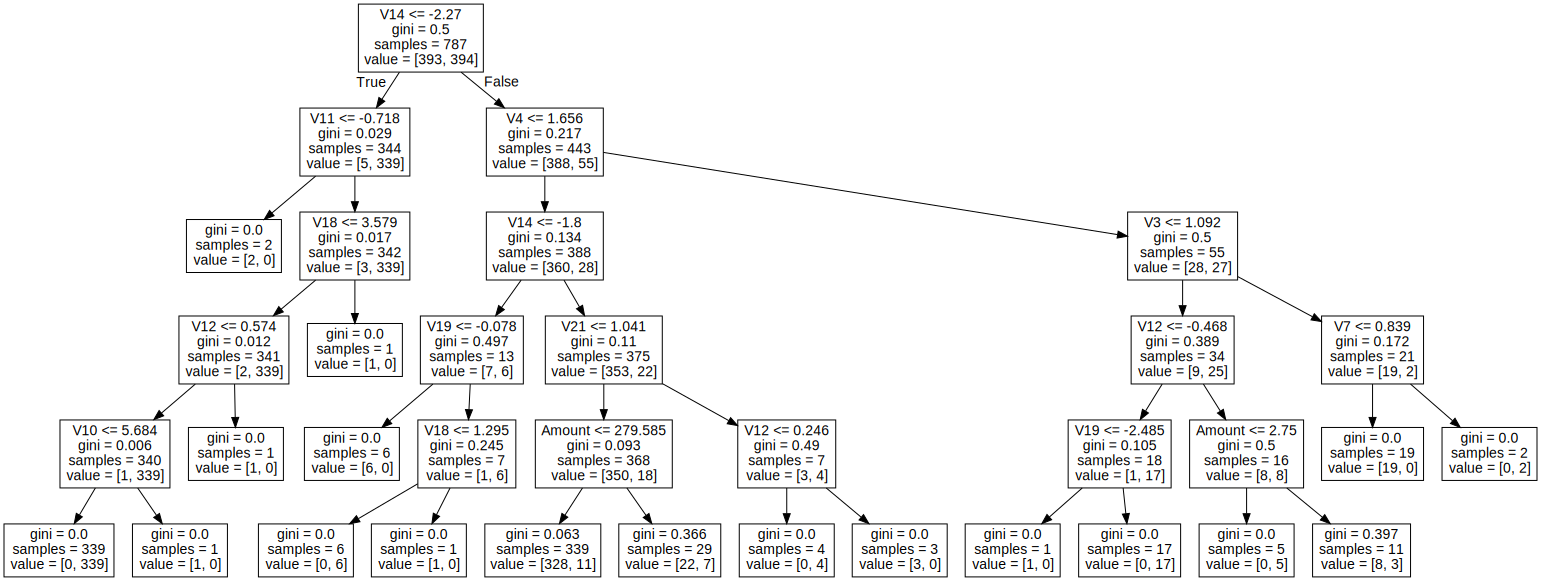

In [58]:
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(dis_tree,feature_names=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']))
display(SVG(graph.pipe(format="svg")))

# Random Forest

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier 
rnd=RandomForestClassifier(n_estimators=500)
rnd.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [61]:
pred_r=rnd.predict(X_test)

In [62]:
#Accuracy on test data
X_test_prediction=rnd.predict(X_test)
test_data_accuracy_r=accuracy_score(y_test,pred_r)
print(test_data_accuracy_r)

0.9289340101522843


In [63]:
#importing our evaluting metrics,which are confusion matrics and classifiaction report
#these metrics are for classification problms

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred_r,y_test))
print(classification_report(pred_r,y_test))
cm=confusion_matrix(pred_r,y_test)

[[98 13]
 [ 1 85]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       111
           1       0.87      0.99      0.92        86

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



# Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gb=GaussianNB()
model=gb.fit(X_train,y_train)
predicted=gb.predict(X_test)
print("Predicted values: {}".format(predicted))
print("Accuracy: {}".format(metrics.accuracy_score(y_test,predicted)))

Predicted values: [0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]
Accuracy: 0.8730964467005076


# KNN Algorithm     

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [68]:
knn=KNeighborsClassifier(n_neighbors=7,n_jobs=12)
knn.fit(X_train,y_train)

pred_k=knn.predict(X_test)

print("Classifier created")

score=accuracy_score(y_test,pred_k)
print(score)

Classifier created
0.6142131979695431


In [69]:
confusion=metrics.confusion_matrix(y_test,pred_k)
print(confusion)

[[60 39]
 [37 61]]


In [70]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]


In [71]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test,pred_k))

0.6142131979695431
0.6142131979695431


In [72]:
precision = TP / float(TP + FP)

print(precision)
knn_pre=precision_score(y_test,pred_k)
print(knn_pre)

0.61
0.61


# Conclusion

### After apply different Algorithms We final conclude that Random Forest gives accuracy 93%.

In [73]:
Time=float(input("Enter time:"))
V1=float(input("Enter value of V1:"))
V2=float(input("Enter value of V2:"))
V3=float(input("Enter value of V3:"))
V4=float(input("Enter value of V4:"))
V5=float(input("Enter value of V5:"))
V6=float(input("Enter value of V6:"))
V7=float(input("Enter value of V7:"))
V8=float(input("Enter value of V8:"))
V9=float(input("Enter value of V9:"))
V10=float(input("Enter value of V10:"))
V11=float(input("Enter value of V11:"))
V12=float(input("Enter value of V12:"))
V13=float(input("Enter value of V13:"))
V14=float(input("Enter value of V14:"))
V15=float(input("Enter value of V15:"))
V16=float(input("Enter value of V16:"))
V17=float(input("Enter value of V17:"))
V18=float(input("Enter value of V18:"))
V19=float(input("Enter value of V19:"))
V20=float(input("Enter value of V20:"))
V21=float(input("Enter value of V21:"))
V22=float(input("Enter value of V22:"))
V23=float(input("Enter value of V23:"))
V24=float(input("Enter value of V24:"))
V25=float(input("Enter value of V25:"))
V26=float(input("Enter value of V26:"))
V27=float(input("Enter value of V27:"))
V28=float(input("Enter value of V28:"))
Amount=float(input("Enter value of Amount:"))

prediction=rnd.predict([[Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,
                       V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount]])
print(prediction)
if prediction==1:
    print("Fraud Transaction Occurs")
else:
    print("Normal Transaction...")

Enter time:556
Enter value of V1:52
Enter value of V2:52
Enter value of V3:45
Enter value of V4:45
Enter value of V5:85
Enter value of V6:54
Enter value of V7:45
Enter value of V8:84
Enter value of V9:57
Enter value of V10:89
Enter value of V11:52
Enter value of V12:45
Enter value of V13:87
Enter value of V14:65
Enter value of V15:87
Enter value of V16:45
Enter value of V17:25
Enter value of V18:49
Enter value of V19:78
Enter value of V20:89
Enter value of V21:75
Enter value of V22:26
Enter value of V23:35
Enter value of V24:45
Enter value of V25:87
Enter value of V26:98
Enter value of V27:75
Enter value of V28:85
Enter value of Amount:122
[0]
Normal Transaction...


##### Generate Report 

In [74]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# Profile_Report=ProfileReport(new_dataset)

# Profile_Report